Using Colab cache for faster access to the 'heart-disease-dataset' dataset.
Dataset downloaded at: /kaggle/input/heart-disease-dataset
Available files: ['heart.csv']
Dataset shape: (1025, 14)
Column names: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 n

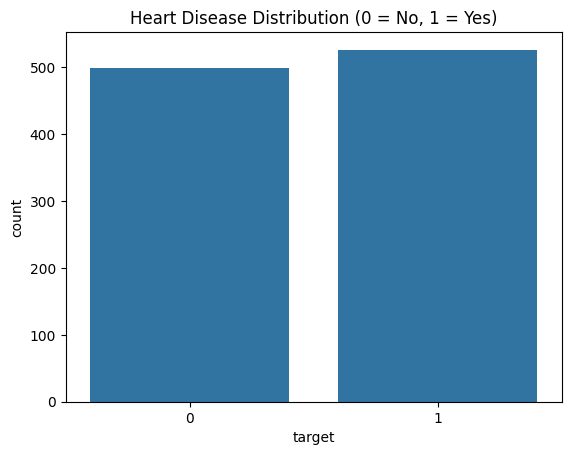

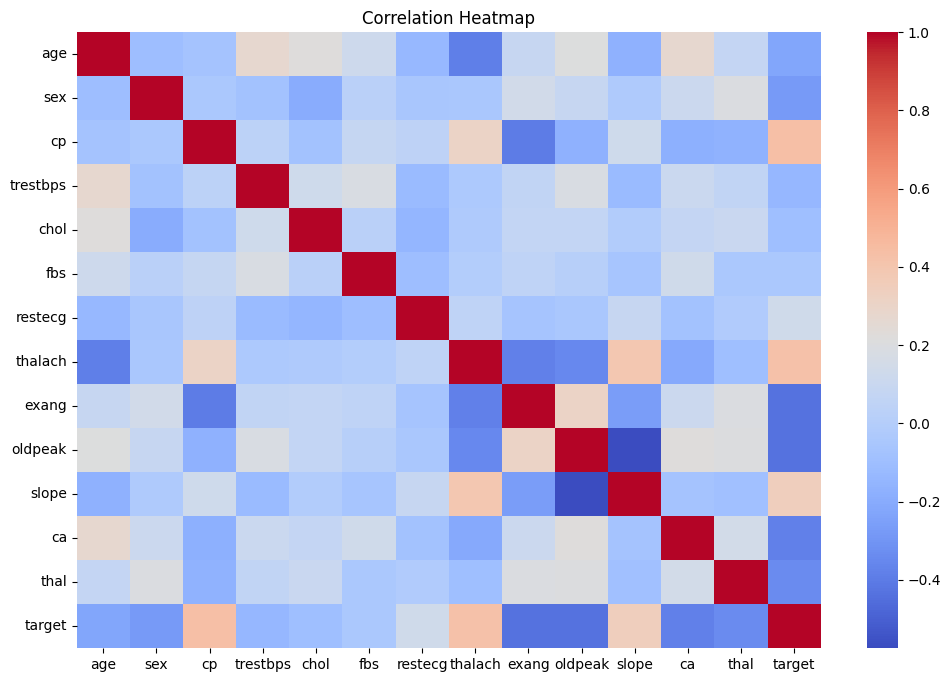

Training samples: 820
Testing samples: 205
Model accuracy: 0.7951219512195122


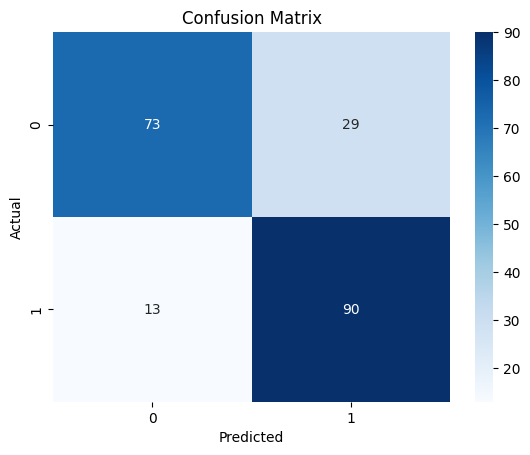

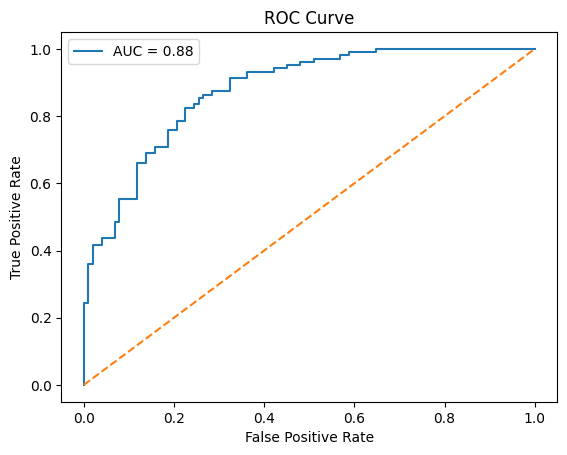

ROC-AUC score: 0.8770226537216829


,Feature,Importance
2,cp,0.847057
10,slope,0.535876
6,restecg,0.262391
7,thalach,0.028880
0,age,0.000642
4,chol,-0.008867
3,trestbps,-0.018159
5,fbs,-0.164529
9,oldpeak,-0.679894
11,ca,-0.814054


In [24]:
# Task 3: Heart Disease Prediction using Logistic Regression
# Objective: Predict whether a person has heart disease based on health data

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

import kagglehub
import os

# Download the dataset from KaggleHub
dataset_path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
print("Dataset downloaded at:", dataset_path)

# Check files in the dataset directory
print("Available files:", os.listdir(dataset_path))

# Load the dataset
df = pd.read_csv(os.path.join(dataset_path, "heart.csv"))

# Preview the dataset
df.head()

# Basic dataset information
print("Dataset shape:", df.shape)
print("Column names:", df.columns)

df.info()

print("Missing values per column:")
df.isnull().sum()

# Visualize distribution of heart disease cases
sns.countplot(x="target", data=df)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()

# Correlation heatmap to understand feature relationships
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Separate features and target variable
X = df.drop("target", axis=1)
y = df["target"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC-AUC score:", roc_auc)

# Feature importance based on Logistic Regression coefficients
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_[0]
}).sort_values(by="Importance", ascending=False)

importance

## Observations
- The dataset contains both heart disease (1) and non-heart disease (0) cases.
- Logistic Regression achieved a reasonable accuracy on the test set.
- The confusion matrix shows the number of correct and incorrect predictions.
- ROC-AUC indicates the model performs better than random guessing.
- Coefficients suggest which features push the prediction toward heart disease vs no disease.

## Conclusion
In this task, we successfully built a Logistic Regression model to predict heart disease.
We explored the dataset, trained the model, and evaluated it using accuracy, confusion matrix,
and ROC-AUC. This provides a strong baseline model for health risk prediction.
